In [ ]:
%matplotlib inline

# Istogramma delle frequenze di campionamento

Progresso: 100.00%


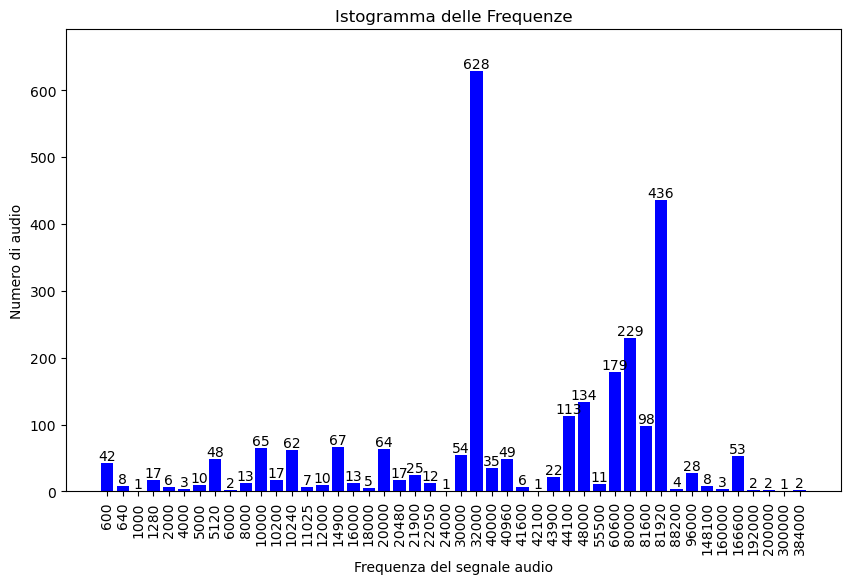

File: AHD_Airmar.wav, Posizione: Target, Frequenza di campionamento: 44100, Massima frequenza di riproduzione: 19261
Progresso: 0.04%File: 20171128c-28_190038.wav, Posizione: Target, Frequenza di campionamento: 32000, Massima frequenza di riproduzione: 1477
Progresso: 0.08%File: 20171227a-66_110853.wav, Posizione: Target, Frequenza di campionamento: 32000, Massima frequenza di riproduzione: 1203
Progresso: 0.11%File: 20171127a-24_105442.wav, Posizione: Target, Frequenza di campionamento: 32000, Massima frequenza di riproduzione: 1250
Progresso: 0.15%File: 20171210-49_49.wav, Posizione: Target, Frequenza di campionamento: 32000, Massima frequenza di riproduzione: 2711
Progresso: 0.19%File: 20171104-1_200959.wav, Posizione: Target, Frequenza di campionamento: 32000, Massima frequenza di riproduzione: 2453
Progresso: 0.23%File: 20171128-25_052238.wav, Posizione: Target, Frequenza di campionamento: 32000, Massima frequenza di riproduzione: 3258
Progresso: 0.27%File: 20171205-44_145246.wav,

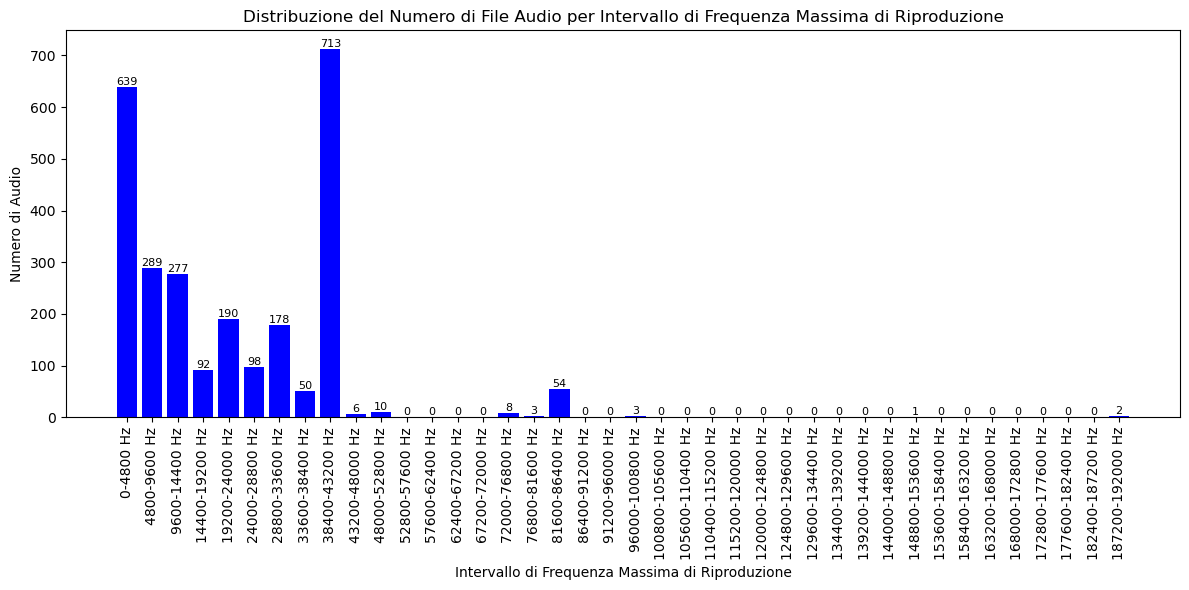

In [3]:
from Set_Data.Lettura_Freq import conteggio_frequenze_campionamento
import matplotlib.pyplot as plt

# Ottieni il dizionario di frequenze e numero di audio associato
frequencies = conteggio_frequenze_campionamento()

# Estrai le chiavi (frequenze) e i valori (numero di audio) dal dizionario
frequency_values = list(frequencies.keys())
audio_numbers = list(frequencies.values())

# Ordina le frequenze e i numeri di audio in base alle frequenze
sorted_indices = sorted(range(len(frequency_values)), key=lambda k: frequency_values[k])
sorted_frequency_values = [frequency_values[i] for i in sorted_indices]
sorted_audio_numbers = [audio_numbers[i] for i in sorted_indices]

# Imposta le dimensioni della figura
plt.figure(figsize=(10, 6))  # Imposta larghezza a 10 pollici e altezza a 6 pollici

# Crea il grafico a barre
bars = plt.bar(range(len(sorted_frequency_values)), sorted_audio_numbers, color='blue')

# Aggiungi le etichette delle frequenze sotto le barre e ruotale di 90 gradi
plt.xticks(range(len(sorted_frequency_values)), sorted_frequency_values, rotation=90)

plt.xlabel('Frequenza del segnale audio')
plt.ylabel('Numero di audio')
plt.title('Istogramma delle Frequenze')

# Imposta l'asse y con uno spazio aggiuntivo per l'annotazione più alta
max_audio_number = max(sorted_audio_numbers)
plt.ylim(0, max_audio_number * 1.1)  # Aumenta l'asse y del 10%

# Aggiungi annotazioni sopra le barre
for bar, audio_count in zip(bars, sorted_audio_numbers):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(audio_count),
             ha='center', va='bottom', color='black')

plt.show()  # Mostra il grafico

# Analisi e Visualizzazione della Distribuzione delle Durate dei File Audio

In [ ]:
from Set_Data.Lettura_Durata import audio_info
import matplotlib.pyplot as plt

# Funzione per determinare l'intervallo di tempo
def get_interval(minutes, seconds):
    if minutes == 0:
        if seconds <= 5:
            return "0-5 secondi"
        if seconds <= 10:
            return "5-10 secondi"
        if seconds <= 15:
            return "10-15 secondi"
        if seconds <= 20:
            return "15-20 secondi"
        if seconds <= 30:
            return "20-30 secondi"
        return "30-60 secondi"
    if minutes <= 10:
        return "1-10 minuti"
    if minutes <= 20:
        return "10-20 minuti"
    if minutes <= 30:
        return "20-30 minuti"
    return "30-60 minuti"

# Lettura dei dati audio
audio_info_dict = audio_info()

# Definizione degli intervalli
intervals = {
    "0-5 secondi": 0,
    "5-10 secondi": 0,
    "10-15 secondi": 0,
    "15-20 secondi": 0,
    "20-30 secondi": 0,
    "30-60 secondi": 0,
    "1-10 minuti": 0,
    "10-20 minuti": 0,
    "20-30 minuti": 0,
    "30-60 minuti": 0,
}

# Conteggio dei file audio per intervallo
for minutes, seconds in audio_info_dict.values():
    interval = get_interval(minutes, seconds)
    intervals[interval] += 1

# Estrazione dei dati per il grafico della distribuzione generale
labels, counts = zip(*intervals.items())

# Creazione del grafico a barre per la distribuzione generale
plt.figure(figsize=(12, 6))
bars = plt.bar(labels, counts, color='blue')

# Annotazione del testo sopra ciascuna barra
for bar, count in zip(bars, counts):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(count),
             ha='center', va='bottom', fontsize=13, color='black')

plt.xlabel('Durata')
plt.ylabel('Numero di Audio')
plt.title('Distribuzione delle Durate dei File Audio')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Definizione degli intervalli per durate inferiori a 15 secondi
short_intervals = {f"{i} secondi" if i != 1 else "1 secondo": 0 for i in range(16)}

# Conteggio totale dei file audio
total_files = 0

# Conteggio dei file audio per intervallo inferiore a 15 secondi
for minutes, seconds in audio_info_dict.values():
    if minutes == 0 and seconds <= 15:
        interval_label = f"{seconds} secondi" if seconds != 1 else "1 secondo"
        short_intervals[interval_label] += 1
        total_files += 1

# Estrazione dei dati per il grafico della distribuzione breve
short_labels, short_counts = zip(*short_intervals.items())

# Creazione del grafico a barre per la distribuzione breve
plt.figure(figsize=(12, 6))
short_bars = plt.bar(short_labels, short_counts, color='green')

# Annotazione del testo sopra ciascuna barra
for bar, count in zip(short_bars, short_counts):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(count),
             ha='center', va='bottom', fontsize=13, color='black')

plt.xlabel('Durata')
plt.ylabel('Numero di Audio')
plt.title(f'Distribuzione delle Durate dei File Audio (Meno di 16 Secondi, Totale: {total_files})')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Per determinare una durata rappresentativa e ottimale per il taglio dei file audio, abbiamo calcolato la mediana delle durate comprese tra 0 e 15 secondi, che è risultata essere pari a 3 secondi. Questo valore centrale rappresenta la durata tipica degli audio brevi nel dataset: metà dei file audio ha una durata inferiore o pari a 3 secondi, mentre l'altra metà ha una durata superiore. Utilizzare la mediana come riferimento ci assicura una rappresentazione equa della maggior parte dei file audio.

Riducendo la durata dei file audio a 3 secondi, ottimizziamo l'efficienza computazionale durante la fase di addestramento del modello di apprendimento. Questo si traduce in un minor utilizzo di risorse computazionali per il processamento e l'analisi dei file audio più brevi, riducendo i tempi di addestramento e migliorando le prestazioni complessive del modello. Inoltre, troncando i file audio a una durata standard di 3 secondi, garantiamo uniformità nei dati di input, il che è cruciale per il modello di apprendimento in quanto lavora meglio con input di dimensioni costanti. Questa uniformità riduce la variabilità e migliora la coerenza dei risultati del modello.

DA FARE - Frequenze massime

File: AHD_Airmar.wav, Posizione: Target, Frequenza di campionamento: 44100, Massima frequenza di riproduzione: 19261
Progresso: 0.04%File: 20171128c-28_190038.wav, Posizione: Target, Frequenza di campionamento: 32000, Massima frequenza di riproduzione: 1477
Progresso: 0.08%File: 20171227a-66_110853.wav, Posizione: Target, Frequenza di campionamento: 32000, Massima frequenza di riproduzione: 1203
Progresso: 0.11%File: 20171127a-24_105442.wav, Posizione: Target, Frequenza di campionamento: 32000, Massima frequenza di riproduzione: 1250
Progresso: 0.15%File: 20171210-49_49.wav, Posizione: Target, Frequenza di campionamento: 32000, Massima frequenza di riproduzione: 2711
Progresso: 0.19%File: 20171104-1_200959.wav, Posizione: Target, Frequenza di campionamento: 32000, Massima frequenza di riproduzione: 2453
Progresso: 0.23%File: 20171128-25_052238.wav, Posizione: Target, Frequenza di campionamento: 32000, Massima frequenza di riproduzione: 3258
Progresso: 0.27%File: 20171205-44_145246.wav,

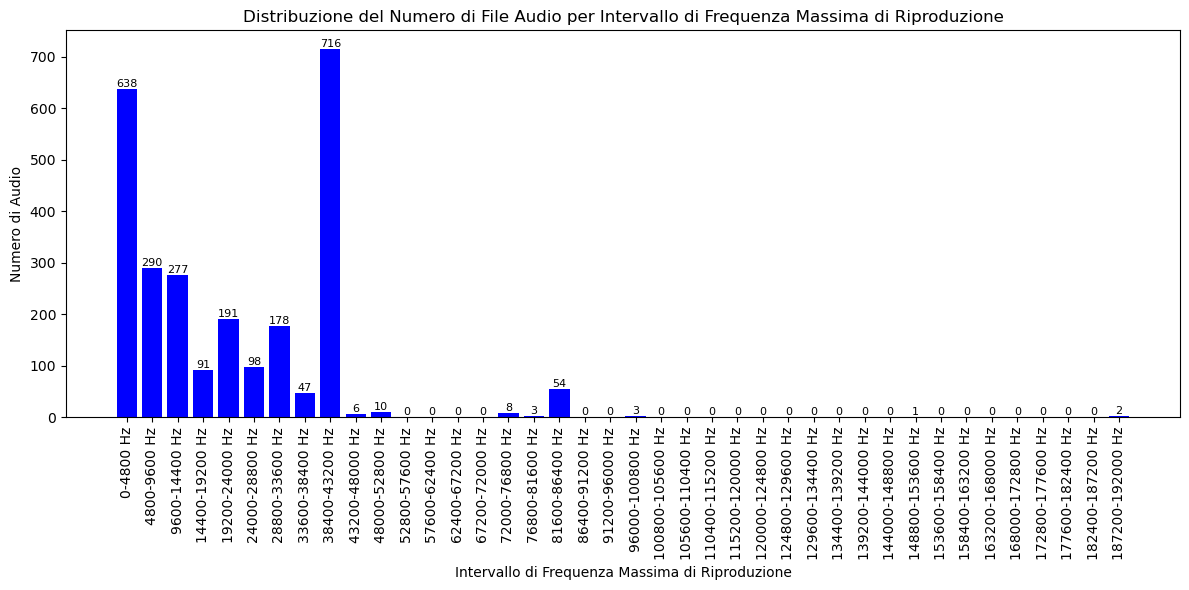

In [3]:
import matplotlib.pyplot as plt
from Set_Data.Lettura_Freq import conteggio_massime_frequenze_riproduzione

# Ottieni il dizionario con il conteggio delle frequenze massime di riproduzione
max_frequency_counter = conteggio_massime_frequenze_riproduzione()

# Trova la massima frequenza massima di riproduzione tra tutti i file audio
max_playback_frequency = max(max_frequency_counter.keys())

# Definisci il numero di intervalli di frequenza desiderati
num_intervals = 40

# Calcola l'ampiezza di ciascun intervallo di frequenza
frequency_step = max_playback_frequency / num_intervals

# Inizializza il dizionario per contare il numero di file audio per ciascun intervallo di frequenza
frequency_counts = {f'{i * frequency_step:.0f}-{(i + 1) * frequency_step:.0f} Hz': 0 for i in range(num_intervals)}

# Aggiorna il conteggio dei file audio per ciascun intervallo di frequenza
for frequency, count in max_frequency_counter.items():
    interval = min(int(frequency / frequency_step), num_intervals - 1)  # Assicura che non superi il numero massimo di intervalli
    interval_key = f'{interval * frequency_step:.0f}-{(interval + 1) * frequency_step:.0f} Hz'
    frequency_counts[interval_key] += count

# Crea il grafico a barre
plt.figure(figsize=(12, 6))
bars = plt.bar(frequency_counts.keys(), frequency_counts.values(), color='blue')

# Aggiungi l'annotazione del testo sopra ciascuna barra
for bar, count in zip(bars, frequency_counts.values()):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(count),
             ha='center', va='bottom', fontsize=8, color='black')

# Personalizza l'aspetto del grafico
plt.xlabel('Intervallo di Frequenza Massima di Riproduzione')
plt.ylabel('Numero di Audio')
plt.title(f'Distribuzione del Numero di File Audio per Intervallo di Frequenza Massima di Riproduzione')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

File: 20171215a-55_103412.wav, Posizione: Target, Frequenza di campionamento: 32000, Massima frequenza di riproduzione: 2773
Progresso: 2.03%File: 20171217a-59_050224.wav, Posizione: Target, Frequenza di campionamento: 32000, Massima frequenza di riproduzione: 11625
Progresso: 2.33%

In [1]:
from Set_Data.Bit_Depth import audio_info

bit_depth_count = audio_info()

print("\nContatore per ogni Bit Depth differente:")
for bit_depth, count in bit_depth_count.items():
    print(f"Bit Depth {bit_depth} bit: {count} file")

Progresso: 100.00%
Totale file audio (.wav): 1894

Contatore per ogni Bit Depth differente:
Bit Depth 16 bit: 1854 file
Bit Depth 8 bit: 17 file
Bit Depth 24 bit: 19 file
Bit Depth 32 bit: 4 file


In [2]:
from Set_Data.Audio_Analysis import analyze_audio_files
audio_file_info = analyze_audio_files()


Progresso: 0.08%

KeyboardInterrupt: 